In [ ]:
import zipfile
import pandas as pd
import os
# from google.colab import drive

# drive.mount('/content/drive/')

#zip_ref = zipfile.ZipFile("/content/drive/My Drive/DS 3010 Project/tvshows.zip", 'r')
# zip_file_path = 'content/drive/Shared with me/DS 3010 Project/tvshows.zip'

# extracted_folder_path = '/content/extracted_files/'


# file_list = os.listdir(zip_ref)
# file_list
# zip_ref = pd.read_csv('/content/drive/My Drive/DS 3010 Project/tvshows.zip')

# import pandas as pd
# from zipfile import ZipFile

# df = pd.concat(
#     [pd.read_csv(ZipFile('some.zip').open(i)) for i in ZipFile('some.zip').namelist()],
#     ignore_index=True
# )

# import os
# import pandas as pd

# # Path to the folder containing CSV files
# folder_path = '/cleanedtvshows'

# # List all CSV files in the folder
# csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# # Iterate through each CSV file
# for file_name in csv_files:
#     # Read the CSV file into a DataFrame
#     file_path = os.path.join(folder_path, file_name)
#     df = pd.read_csv(file_path)

#     # Perform data cleaning operations on the DataFrame
#     # For example, handle missing values, remove duplicates, etc.
#     # Replace these operations with your specific cleaning steps

#     # Handle missing values
#     df.dropna(inplace=True)

#     # Remove duplicates
#     df.drop_duplicates(inplace=True)

#     # Save the cleaned DataFrame back to a CSV file
#     cleaned_file_path = os.path.join(folder_path, 'cleaned_' + file_name)
#     df.to_csv(cleaned_file_path, index=False)



Mounted at /content/drive/


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/DS 3010 Project/cleanedtvshows'

In [83]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Path to the folder containing cleaned CSV files
folder_path = 'cleanedtvshows'

# lists all cleaned CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# intiialize empty df
combined_df = pd.DataFrame()

# iterates through each cleaned CSV file
for file_name in csv_files:
    # reads cleaned CSV file into df
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)

    # concatenate current df with combined DataFrame
    combined_df = pd.concat([combined_df, df], axis=1)

# descriptive statistics
statistics = combined_df.describe()

statistics



,link_type_id,language_type_id,status_id,type_id,show_id,production_country_type_id,origin_country_type_id,show_id,network_type_id,genre_type_id,...,show_id,language_type_id,vote_count,vote_average,show_id,created_by_type_id,show_id,genre_type_id,show_id,spoken_language_type_id
count,3.0,143.00000,6.000000,7.000000,81691.000000,81691.000000,81691.000000,108295.000000,108295.000000,20.00000,...,113269.000000,113269.000000,162143.000000,162143.000000,162143.000000,31852.000000,143711.000000,143711.000000,111686.000000,111686.000000
mean,2.0,72.00000,3.500000,4.000000,114910.322569,91.124653,77.718084,98802.453557,1766.482441,10.50000,...,103423.003938,67.533818,13.834356,2.407624,106075.281862,15926.500000,104532.616272,11.559734,103124.551788,32.155239
std,1.0,41.42463,1.870829,2.160247,64859.551114,61.557675,49.129215,68150.303014,949.279001,5.91608,...,69725.145748,35.461372,194.575049,3.479961,73262.593684,9195.024724,69542.151803,5.606986,69552.996633,25.264476
min,1.0,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.5,36.50000,2.250000,2.500000,70100.500000,30.000000,26.000000,43085.500000,968.000000,5.75000,...,46067.000000,50.000000,0.000000,0.000000,44058.500000,7963.750000,51062.000000,7.000000,46019.250000,6.000000
50%,2.0,72.00000,3.500000,4.000000,103794.000000,89.000000,81.000000,88943.000000,1900.000000,10.50000,...,93070.000000,66.000000,0.000000,0.000000,93688.000000,15926.500000,92646.000000,12.000000,92828.500000,37.000000
75%,2.5,107.50000,4.750000,5.500000,154643.500000,157.000000,129.000000,132745.500000,2525.000000,15.25000,...,137024.000000,80.000000,1.000000,6.000000,155792.500000,23889.250000,137838.000000,17.000000,136679.750000,53.000000
max,3.0,143.00000,6.000000,7.000000,242576.000000,183.000000,160.000000,242576.000000,3398.000000,20.00000,...,242576.000000,143.000000,21857.000000,10.000000,242576.000000,31852.000000,242574.000000,20.000000,242576.000000,74.000000


In [84]:
import seaborn as sns
import numpy as np

# Compute the correlation matrix
combined_df = combined_df[['show_id','name','status_id','status_name','vote_count','vote_average', 
                           'type_id','type_name','popularity','number_of_seasons','genre_type_id',
                           'genre_name','production_country_type_id', 'in_production']]
corr = combined_df.corr(numeric_only=True)


# # Plot a heatmap of the correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()

# Print correlation of features with the target variable ('success')
print("Correlation of features with 'success':")
print(corr)


Correlation of features with 'success':
                             show_id   show_id   show_id   show_id   show_id  \
show_id                     1.000000  0.086153  0.003166  0.132959  0.079867   
show_id                     0.086153  1.000000  0.023393  0.095755  0.047081   
show_id                     0.003166  0.023393  1.000000  0.009615  0.064831   
show_id                     0.132959  0.095755  0.009615  1.000000  0.100393   
show_id                     0.079867  0.047081  0.064831  0.100393  1.000000   
show_id                     0.111534  0.046213  0.044074  0.096191  0.045472   
show_id                     0.116584  0.075105  0.068920  0.082457  0.020447   
show_id                     0.098060  0.074791  0.030790  0.109684  0.060326   
show_id                     0.086679  0.051605  0.024796  0.098196  0.029349   
show_id                     0.085478  0.079461  0.052935  0.120593  0.054888   
show_id                     0.099586  0.080436  0.033278  0.111688  0.060167   


In [77]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout

# # Assume combined_df is already defined and processed
# combined_df = combined_df.dropna()

# # Split features and target variable
# X = combined_df.drop(['type_name'], axis=1)  # Remove non-predictive columns
# y = (combined_df['popularity'] + combined_df['vote_average'] + combined_df['number_of_seasons']) / 3  # Define success metric

# # Standardize features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# # Define the neural network architecture
# model = Sequential([
#     Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
#     Dropout(0.5),
#     Dense(50, activation='relu'),
#     Dropout(0.5),
#     Dense(25, activation='relu'),
#     Dropout(0.5),
# #     Dense(64, activation='relu'),
# #     Dropout(0.75),
#     Dense(1)
# ])

# # Compile the model
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
# model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# # Train the model
# history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2, verbose=1)

# # Evaluate the model
# loss, mae = model.evaluate(X_test, y_test, verbose=0)
# print("Mean Absolute Error on Test Set:", mae)

# # Make predictions
# predictions = model.predict(X_test)


In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Assume combined_df is already defined and processed
df = combined_df.dropna()
df = pd.get_dummies(df, columns=['status_name', 'name','genre_name', 'in_production'])


# Split features and target variable
X = df.drop(['type_name'], axis=1)  # Remove non-predictive columns
y = (df['popularity'] + df['vote_average'] + df['number_of_seasons']) / 3  # Define success metric

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the neural network architecture
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='relu'),
    Dropout(0.5),
#     Dense(64, activation='relu'),
#     Dropout(0.75),
    Dense(1)
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print("Mean Absolute Error on Test Set:", mae)

# Make predictions
predictions = model.predict(X_test)


Epoch 1/100
1/1 [==============================] - 1s 749ms/step - loss: 8803.4355 - mae: 85.3291 - val_loss: 28521.6309 - val_mae: 168.8835
Epoch 2/100
1/1 [==============================] - 0s 30ms/step - loss: 8979.2520 - mae: 85.9312 - val_loss: 28451.6523 - val_mae: 168.6762
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 9168.5410 - mae: 87.0599 - val_loss: 28379.7910 - val_mae: 168.4630
Epoch 4/100
1/1 [==============================] - 0s 38ms/step - loss: 9099.1553 - mae: 86.4270 - val_loss: 28321.2754 - val_mae: 168.2893
Epoch 5/100
1/1 [==============================] - 0s 57ms/step - loss: 8255.0146 - mae: 81.9058 - val_loss: 28261.1680 - val_mae: 168.1106
Epoch 6/100
1/1 [==============================] - 0s 27ms/step - loss: 8557.8818 - mae: 83.3790 - val_loss: 28193.6113 - val_mae: 167.9095
Epoch 7/100
1/1 [==============================] - 0s 29ms/step - loss: 7956.1836 - mae: 79.8506 - val_loss: 28117.8750 - val_mae: 167.6839
Epoch 8/100
1/1 [==

1/1 [==============================] - 0s 26ms/step - loss: 952.6398 - mae: 28.6609 - val_loss: 26025.5039 - val_mae: 161.3242
Epoch 60/100
1/1 [==============================] - 0s 25ms/step - loss: 836.6848 - mae: 28.5552 - val_loss: 25997.8965 - val_mae: 161.2386
Epoch 61/100
1/1 [==============================] - 0s 29ms/step - loss: 2183.0820 - mae: 44.5073 - val_loss: 25978.5039 - val_mae: 161.1785
Epoch 62/100
1/1 [==============================] - 0s 28ms/step - loss: 2849.3694 - mae: 45.9273 - val_loss: 25951.5215 - val_mae: 161.0948
Epoch 63/100
1/1 [==============================] - 0s 26ms/step - loss: 295.2882 - mae: 14.7937 - val_loss: 25923.8652 - val_mae: 161.0089
Epoch 64/100
1/1 [==============================] - 0s 25ms/step - loss: 1499.6641 - mae: 33.5681 - val_loss: 25892.2363 - val_mae: 160.9106
Epoch 65/100
1/1 [==============================] - 0s 28ms/step - loss: 2754.6233 - mae: 47.5745 - val_loss: 25858.2754 - val_mae: 160.8051
Epoch 66/100
1/1 [===========

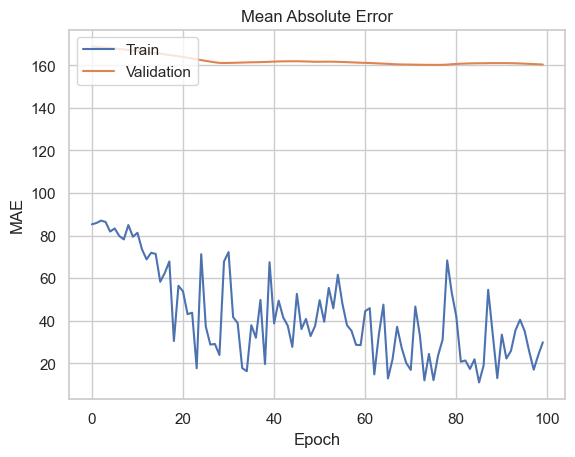

In [96]:
# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


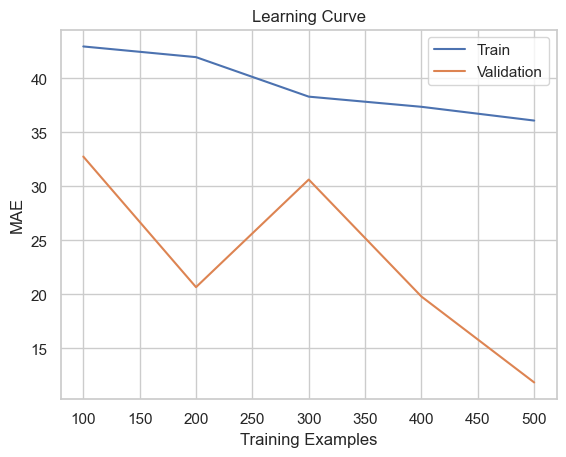

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Define function to calculate MAE for different training set sizes
def calculate_mae_for_sizes(model, X, y, train_sizes, cv=5):
    train_mae_mean = []
    test_mae_mean = []

    for size in train_sizes:
        train_mae = []
        test_mae = []
        for _ in range(cv):
            indices = np.random.choice(range(len(X)), size=size, replace=True)  # Change replace=False to replace=True
            X_train = X[indices]
            y_train = y[indices]

            history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

            train_mae.append(history.history['mae'][-1])  # Get MAE from last epoch
            test_loss, test_mae_last = model.evaluate(X_test, y_test, verbose=0)
            test_mae.append(test_mae_last)

        train_mae_mean.append(np.mean(train_mae))
        test_mae_mean.append(np.mean(test_mae))

    return train_mae_mean, test_mae_mean

# Define different training set sizes
train_sizes = [100, 200, 300, 400, 500]

# Calculate MAE for different training set sizes
train_mae_mean, test_mae_mean = calculate_mae_for_sizes(model, X_scaled, y, train_sizes)

# Plot learning curve
plt.plot(train_sizes, train_mae_mean, label='Train')
plt.plot(train_sizes, test_mae_mean, label='Validation')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('MAE')
plt.legend()
plt.show()


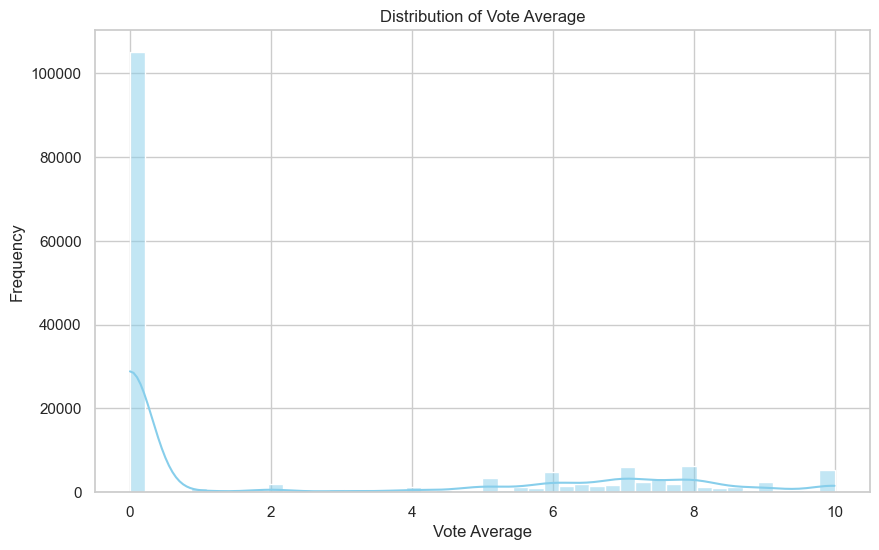

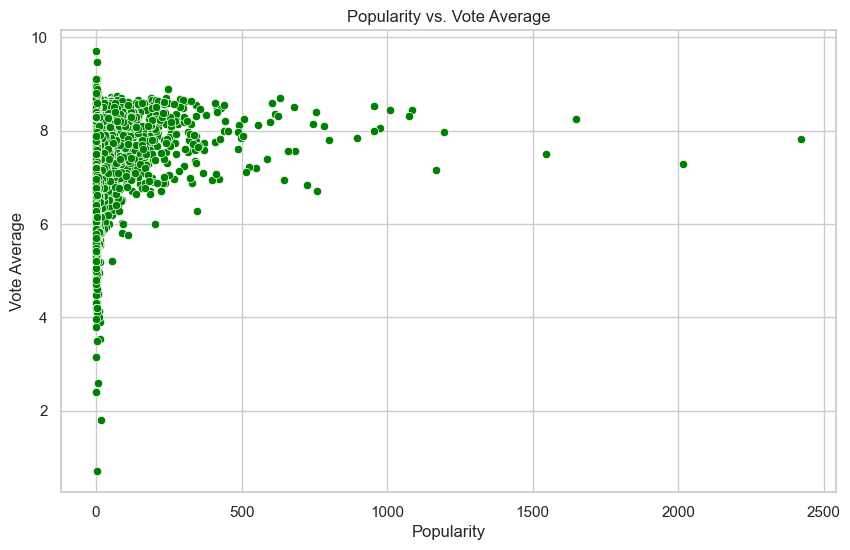

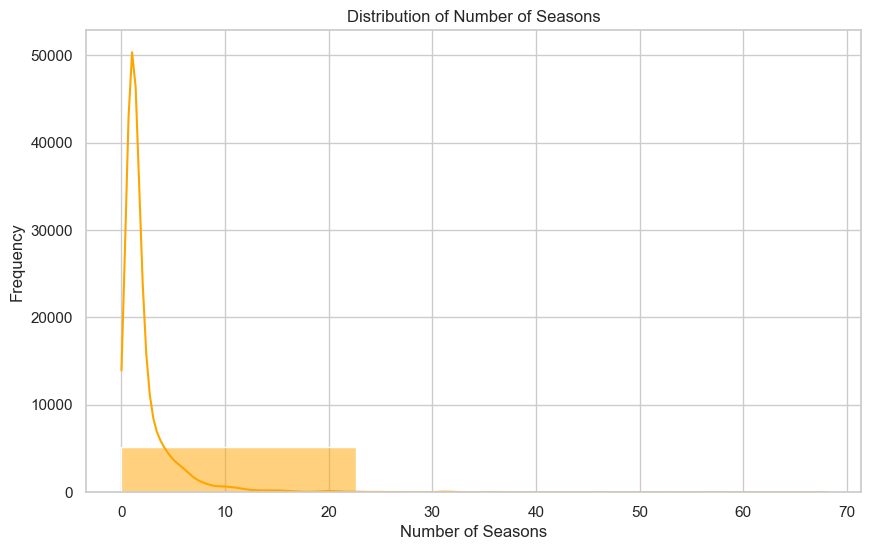

/var/folders/hx/m1245j7156j70f2dhyx_1ykm0000gn/T/ipykernel_22496/4150608637.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=combined_df, y='genre_name', order=combined_df['genre_name'].value_counts().index, palette='viridis')


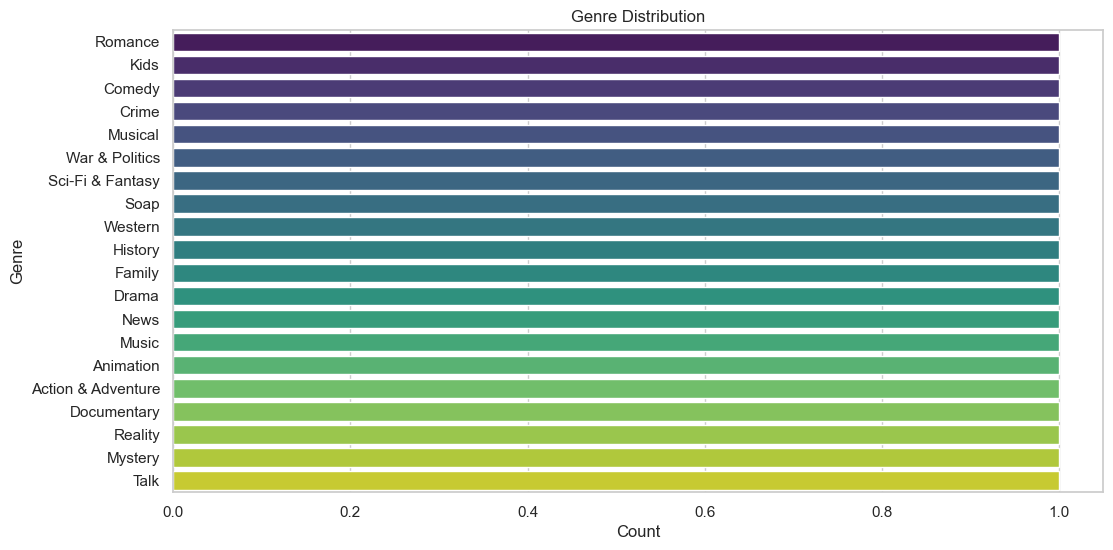

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

combined_df.dropna()

# Set seaborn style
sns.set(style="whitegrid")

# Plot 1: Distribution of Vote Average
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='vote_average', kde=True, color='skyblue')
plt.title('Distribution of Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Popularity vs. Vote Average
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='popularity', y='vote_average', color='green')
plt.title('Popularity vs. Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

# Plot 3: Number of Seasons Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='number_of_seasons', bins=3, kde=True, color='orange')
plt.title('Distribution of Number of Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.show()

# Plot 4: Genre Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=combined_df, y='genre_name', order=combined_df['genre_name'].value_counts().index, palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()
